In [1]:
import numpy as np
import os
import pandas as pd 
import matplotlib.pyplot as plt

os.chdir('/Users/matthiasboeker/Desktop/Master_Thesis/Schizophrenia_Depression_Project')
from Modules.func.support_functions import *

In [2]:
shizophrenia_p, shizophrenia_c = load_data()
#Reshape 
shizophrenia_p = [np.array(X).reshape(len(X), 1) for X in shizophrenia_p]
shizophrenia_c = [np.array(X).reshape(len(X), 1) for X in shizophrenia_c]

## Feature Extraction 

### Extract average activity and variablitiy 

In [3]:
means_p = np.array([np.mean(shizophrenia_p[i]) for i in range(0,len(shizophrenia_p))])
means_c = np.array([np.mean(shizophrenia_c[i]) for i in range(0,len(shizophrenia_c))])
var_p = np.array([np.var(shizophrenia_p[i]) for i in range(0,len(shizophrenia_p))])
var_c = np.array([np.var(shizophrenia_c[i]) for i in range(0,len(shizophrenia_c))])

### Extract 24h daily structure 

In [4]:
days_c = [np.array([shizophrenia_c[l][i*(60*24):(i+1)*(60*24)] for i in range(0,int(len(shizophrenia_c[l])/(60*24))-1)]) for l in range(0,len(shizophrenia_c))]
days_p = [np.array([shizophrenia_p[l][i*(60*24):(i+1)*(60*24)] for i in range(0,int(len(shizophrenia_p[l])/(60*24))-1)]) for l in range(0,len(shizophrenia_p))]
# Day mean and standard deviation
day_mean_p = [np.mean(days_p[i], axis=0) for i in range(0,len(days_p))]
day_mean_c = [np.mean(days_c[i], axis=0) for i in range(0,len(days_c))]
prop_z_p = [np.mean([(days_p[i][j]==0).sum()/len(days_p[i][j]) for j in range(0,len(days_p[i]))]) for i in range(0,len(days_p))]
prop_z_c = [np.mean([(days_c[i][j]==0).sum()/len(days_c[i][j]) for j in range(0,len(days_c[i]))]) for i in range(0,len(days_c))]

### Extract 12h structure 9-21 day

In [5]:
daily_c = [np.array([shizophrenia_c[l][i*(60*12):(i+1)*(60*12)] for i in range(0,int(len(shizophrenia_c[l])/(60*12))-1,2)]) for l in range(0,len(shizophrenia_c))]
daily_p = [np.array([shizophrenia_p[l][i*(60*12):(i+1)*(60*12)] for i in range(0,int(len(shizophrenia_p[l])/(60*12))-1, 2)]) for l in range(0,len(shizophrenia_p))]
# Daily mean and standard deviation
daily_mean_p = [np.mean(daily_p[i], axis=0) for i in range(0,len(daily_p))]
daily_mean_c = [np.mean(daily_c[i], axis=0) for i in range(0,len(daily_c))]
daily_std_p = [np.std(daily_p[i], axis=0) for i in range(0,len(daily_p))]
daily_std_c = [np.std(daily_c[i], axis=0) for i in range(0,len(daily_c))]

### Extract 12h structure 21-9 night


In [6]:
night_c = [np.array([shizophrenia_c[l][i*(60*12):(i+1)*(60*12)] for i in range(1,int(len(shizophrenia_c[l])/(60*12))-1,2)]) for l in range(0,len(shizophrenia_c))]
night_p = [np.array([shizophrenia_p[l][i*(60*12):(i+1)*(60*12)] for i in range(1,int(len(shizophrenia_p[l])/(60*12))-1, 2)]) for l in range(0,len(shizophrenia_p))]
# Nightly mean and standard deviation
night_mean_p = [np.mean(night_p[i], axis=0) for i in range(0,len(night_p))]
night_mean_c = [np.mean(night_c[i], axis=0) for i in range(0,len(night_c))]
night_std_p = [np.std(night_p[i], axis=0) for i in range(0,len(night_p))]
night_std_c = [np.std(night_c[i], axis=0) for i in range(0,len(night_c))]

### Intradaily Variability 

In [7]:
#Squared Differenciate
shizophrenia_c_nom = [(np.diff(shizophrenia_c[l],axis=0)[1:]**2).sum()*len(shizophrenia_c[l]) for l in range(0,len(shizophrenia_c))]
shizophrenia_p_nom = [(np.diff(shizophrenia_p[l],axis=0)[1:]**2).sum()*len(shizophrenia_p[l]) for l in range(0,len(shizophrenia_p))]

In [8]:
IV_c = [shizophrenia_c_nom[l]/((len(shizophrenia_c[l])-1)*var_c[l]) for l in range(0,len(shizophrenia_c))]
IV_p = [shizophrenia_p_nom[l]/((len(shizophrenia_p[l])-1)*var_p[l]) for l in range(0,len(shizophrenia_p))]

### Interday Stability

In [9]:
# Get the hourly means
hourly_mean_p = [np.array([np.mean(day_mean_p[l][i*(60):(i+1)*(60)]) for i in range(0,int(len(day_mean_p[l])/60))]) for l in range(0,len(day_mean_p))]
hourly_mean_c = [np.array([np.mean(day_mean_c[l][i*(60):(i+1)*(60)]) for i in range(0,int(len(day_mean_c[l])/60))]) for l in range(0,len(day_mean_c))]



In [10]:
IS_p = [len(shizophrenia_p[i])*((hourly_mean_p[i]-means_p[i])**2).sum()/(day_mean_p[i].shape[0]*var_p[i]) for i in range(0,len(shizophrenia_p))]   
IS_c = [len(shizophrenia_c[i])*((hourly_mean_c[i]-means_c[i])**2).sum()/(day_mean_c[i].shape[0]*var_c[i]) for i in range(0,len(shizophrenia_c))]

### Autocorrelation 

In [58]:
def autocorr(x):
    result = np.correlate(x, x)
    return result[result.size // 2:]

In [66]:
ar_p = np.squeeze(np.array([autocorr(shizophrenia_p[i][:,0]) for i in range(0,len(shizophrenia_p))]).reshape(1,-1))
ar_c = np.squeeze(np.array([autocorr(shizophrenia_c[i][:,0]) for i in range(0,len(shizophrenia_c))]).reshape(1,-1))


In [268]:
from statsmodels.tsa.stattools import acf, pacf
lags = acf(shizophrenia_p[10], nlags=1500)

### Root Mean Square of successive differences

In [37]:
rmssd_p = np.array([np.sqrt((np.diff(shizophrenia_p[i],axis=0)**2).sum()/(len(shizophrenia_p[i])-1)) for i in range(0,len(shizophrenia_p))])
rmssd_c = np.array([np.sqrt((np.diff(shizophrenia_c[i],axis=0)**2).sum()/(len(shizophrenia_c[i])-1)) for i in range(0,len(shizophrenia_c))])

### Creating Feature Matrix

In [347]:
feat_p  = {'Mean': means_p, 'Variance': var_p,'f.prop':prop_z_p ,'IV':  IV_p,'IS':  IS_p, 'AR':  ar_p,'RMSSD': rmssd_p ,'label': np.repeat(1, len(var_p))}
feat_df_p = pd.DataFrame(data=feat_p)

feat_c  = {'Mean': means_c, 'Variance': var_c,'f.prop':prop_z_c ,'IV':  IV_c, 'IS':  IS_c, 'AR':  ar_c,'RMSSD': rmssd_c , 'label': np.repeat(0, len(var_c))}
feat_df_c = pd.DataFrame(data=feat_c)

feat = pd.concat([feat_df_p, feat_df_c], axis=0, sort=False)
feat = feat.reset_index()


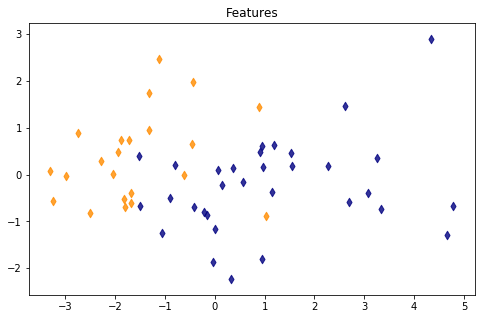

In [134]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
X = feat.drop(['label','index', 'f.prop'], axis=1)
y = feat['label']

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns= X.columns.values)
# pca of features spaces 
pca = KernelPCA(n_components=2, kernel='linear')
principalComponents_all = pca.fit_transform(X)


fig = plt.figure(figsize=(8,5))
color = ['darkorange' if x>0 else 'navy' for x in y]
shape = ['d' if k>0 else 'd' for k in y]
for x, l, c, m in zip(principalComponents_all[:,0], principalComponents_all[:,1], color, shape):
    plt.scatter(x, l, alpha=0.8, c=c,marker=m)  
    plt.title('Features')


### Correlation Matrix

In [180]:
X = feat.drop(['label','index', 'f.prop'], axis=1)
y = feat['label']
print(X.corr())

              mean  variance        IV        IS        AR     rmssd
mean      1.000000  0.923876 -0.467956  0.223444  0.916893  0.942384
variance  0.923876  1.000000 -0.466782  0.111338  0.946412  0.917714
IV       -0.467956 -0.466782  1.000000 -0.025374 -0.294695 -0.328856
IS        0.223444  0.111338 -0.025374  1.000000  0.260134  0.092458
AR        0.916893  0.946412 -0.294695  0.260134  1.000000  0.882069
rmssd     0.942384  0.917714 -0.328856  0.092458  0.882069  1.000000


## Logistic Regression with L1 Reg

In [427]:
# Logisitc Regression
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
X = feat.drop(['label','index','f.prop'], axis=1)
y = feat['label']
#Standardize the data 
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns= X.columns.values)
X_train,  X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=0,  shuffle=True)
class_weight = 'balanced'
penalty = 'l1'
C= [50,10, 5, 1, 0.8, 0.5, 0.3, 0.1, 0.08, 0.05, 0.03, 0.01]
n_jobs =1
solver='liblinear'
coefs = []
areaUnderROC = []
average_precision = []
for c in C: 
    logReg = LogisticRegression(C=c,random_state=133,penalty = penalty, solver=solver, n_jobs=n_jobs,fit_intercept=True )

    trainingScores = []
    cvScores = []
    
    predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train.index,columns=[0,1])

    for train_index, test_index in k_fold.split(X_train,y_train):
        X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
        y_train_fold, y_cv_fold = y_train.iloc[train_index],y_train.iloc[test_index]

        logReg.fit(X_train_fold, y_train_fold)
        loglossTraining = log_loss(y_train_fold,logReg.predict_proba(X_train_fold)[:,1])
    

        trainingScores.append(loglossTraining)

        predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = logReg.predict_proba(X_cv_fold)
        loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
        cvScores.append(loglossCV)
        preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
        preds.columns = ['trueLabel','prediction']
        predictionsBasedOnKFoldsLogisticRegression = preds.copy()
    fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
    average_precision.append(average_precision_score(preds['trueLabel'],
                                            preds['prediction']))
    areaUnderROC.append(auc(fpr, tpr))
    
    coefs.append(logReg.coef_)
    
coefs = pd.DataFrame(np.squeeze(np.asarray(coefs)), columns = X.columns)  
coefs['C'] = C

res = np.concatenate((np.array(areaUnderROC,ndmin=2),np.array(average_precision,ndmin=2)),axis=0)
res = res.reshape(12,2)
pred_res = pd.DataFrame(res, columns = ['AUC', 'Avg_Precision']) 

### Performance Plot for different C parameters

In [428]:
pred_res

,AUC,Avg_Precision
0,0.916071,0.919643
1,0.921429,0.923214
2,0.921429,0.919643
3,0.917857,0.898214
4,0.873214,0.500000
5,0.500000,0.500000
6,0.927114,0.932767
7,0.931824,0.928379
8,0.927421,0.923347
9,0.916656,0.886183


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


Max AUC at C:  0.1
Max Average Precision at C:  0.3


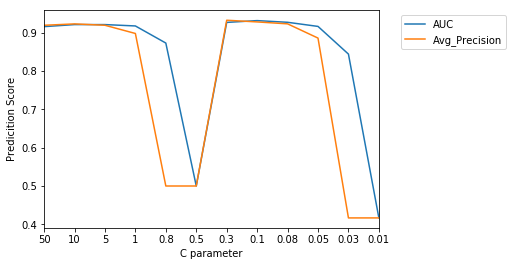

In [429]:
pred_res.plot()
plt.xticks(range(0,len(C)),C)
plt.legend(title='', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xlabel('C parameter')
plt.ylabel('Predicition Score')
print('Max AUC at C: ',C[np.argmax(pred_res['AUC'])])
print('Max Average Precision at C: ',C[np.argmax(pred_res['Avg_Precision'])])

### L1 Regularization Plot Coefficients 

Text(0,0.5,'Coefficient value')

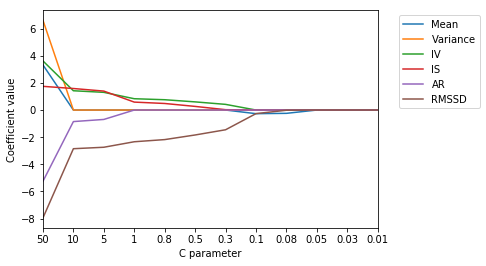

In [430]:
coefs_plot = coefs.drop(['C'], axis=1)
coefs_plot.plot()                 
plt.xticks(range(0,len(C)),C)
plt.legend(title='', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xlabel('C parameter')
plt.ylabel('Coefficient value')

Text(0,0.5,'Coefficient value')

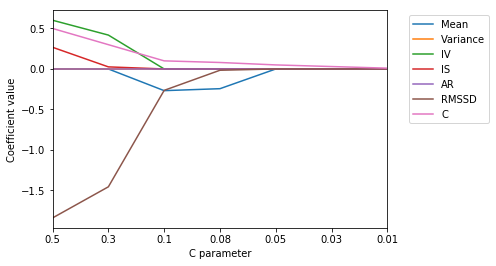

In [431]:
zoom = coefs.iloc[5:,:].reset_index(drop=True)
zoom.plot()
plt.xticks(range(0,len(C[5:])),C[5:])
plt.legend(title='', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xlabel('C parameter')
plt.ylabel('Coefficient value')

In [418]:
coefs

,Mean,Variance,IV,IS,AR,RMSSD,C
0,3.326861,6.621356,3.621100,1.747152,-5.253233,-7.954884,50.00
1,0.000000,0.000000,1.422064,1.587529,-0.850947,-2.851779,10.00
2,0.000000,0.000000,1.304775,1.397248,-0.693832,-2.743926,5.00
3,0.000000,0.000000,0.834411,0.585060,0.000000,-2.338600,1.00
4,0.000000,0.000000,0.760537,0.483431,0.000000,-2.179461,0.80
5,0.000000,0.000000,0.601523,0.267610,0.000000,-1.838850,0.50
6,0.000000,0.000000,0.418293,0.025786,0.000000,-1.454787,0.30
7,-0.267732,0.000000,0.000000,0.000000,0.000000,-0.264023,0.10
8,-0.243390,0.000000,0.000000,0.000000,0.000000,-0.015826,0.08
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.05


In [432]:
X = feat.drop(['label','index','f.prop', 'Variance', 'AR'], axis=1)
y = feat['label']

#Standardize the data 
scaler = StandardScaler()
for f in X.columns:
    #X = pd.DataFrame(scaler.fit_transform(X), columns= X.columns.values)
    dat = tools.add_constant(X[f])
    log_reg = sm.Logit(y, dat).fit()
    print(log_reg.summary())
  

Optimization terminated successfully.
         Current function value: 0.381288
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                   54
Model:                          Logit   Df Residuals:                       52
Method:                           MLE   Df Model:                            1
Date:                Sat, 31 Oct 2020   Pseudo R-squ.:                  0.4359
Time:                        17:12:52   Log-Likelihood:                -20.590
converged:                       True   LL-Null:                       -36.499
Covariance Type:            nonrobust   LLR p-value:                 1.693e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9701      1.385      3.589      0.000       2.256       7.685
Mean          -0.0259      0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Single SKlearn Log Regression RMSSD

Index(['RMSSD'], dtype='object')


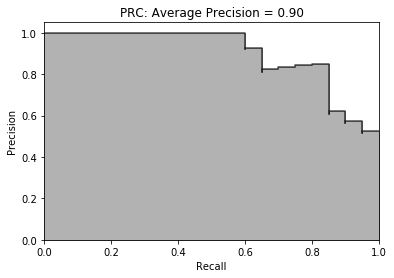

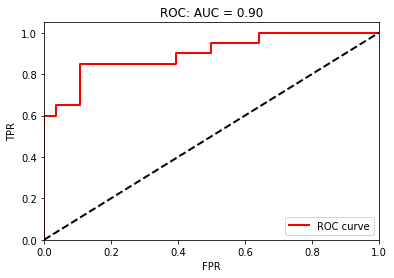

In [438]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve, average_precision_score, log_loss
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
X = feat.drop(['label','index','f.prop', 'Variance', 'AR','Mean','IV','IS' ], axis=1)
y = feat['label']
print(X.columns)
X_train,  X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=0,  shuffle=True)
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)


# Logisitc Regression
class_weight = 'balanced'
penalty = 'l1'
C=1
n_jobs =1
solver='liblinear'
logReg = LogisticRegression(C=C,random_state=133,penalty = penalty, solver=solver, n_jobs=n_jobs, fit_intercept=True )

trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train.index,columns=[0,1])

for train_index, test_index in k_fold.split(X_train,y_train):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index],y_train.iloc[test_index]

    logReg.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold,logReg.predict_proba(X_train_fold)[:,1])
    

    trainingScores.append(loglossTraining)

    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = logReg.predict_proba(X_cv_fold)
    loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)


preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLogisticRegression = preds.copy()


precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],preds['prediction'])


average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('PRC: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])

areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC: AUC = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

### Single SKlearn Log Regression IV

Index(['IV'], dtype='object')


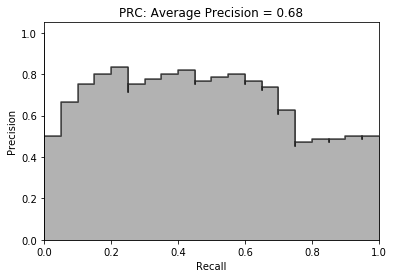

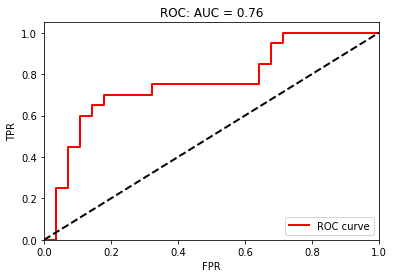

In [439]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve, average_precision_score, log_loss
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
X = feat.drop(['label','index','f.prop', 'Variance', 'AR','Mean','RMSSD','IS' ], axis=1)
y = feat['label']
X_train,  X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=0,  shuffle=True)
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)
print(X.columns)

# Logisitc Regression
class_weight = 'balanced'
penalty = 'l1'
C=1
n_jobs =1
solver='liblinear'
logReg = LogisticRegression(C=C,random_state=133,penalty = penalty, solver=solver, n_jobs=n_jobs, fit_intercept=True )

trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train.index,columns=[0,1])

for train_index, test_index in k_fold.split(X_train,y_train):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index],y_train.iloc[test_index]

    logReg.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold,logReg.predict_proba(X_train_fold)[:,1])
    

    trainingScores.append(loglossTraining)

    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = logReg.predict_proba(X_cv_fold)
    loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)


preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLogisticRegression = preds.copy()


precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],preds['prediction'])


average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('PRC: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])

areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC: AUC = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

### Single SKlearn Log Regression Mean

Index(['Mean', 'IV'], dtype='object')


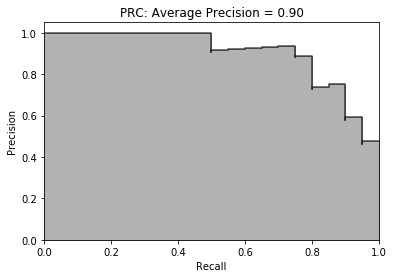

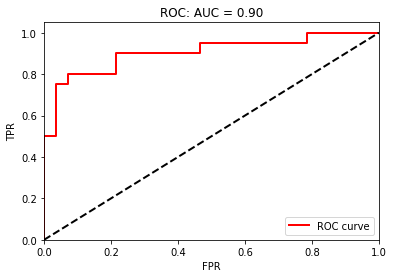

In [440]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve, average_precision_score, log_loss
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
X = feat.drop(['label','index','f.prop', 'Variance', 'AR','RMSSD','IS' ], axis=1)
y = feat['label']
X_train,  X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=0,  shuffle=True)
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)
print(X.columns)

# Logisitc Regression
class_weight = 'balanced'
penalty = 'l1'
C=1
n_jobs =1
solver='liblinear'
logReg = LogisticRegression(C=C,random_state=133,penalty = penalty, solver=solver, n_jobs=n_jobs, fit_intercept=True )

trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train.index,columns=[0,1])

for train_index, test_index in k_fold.split(X_train,y_train):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index],y_train.iloc[test_index]

    logReg.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold,logReg.predict_proba(X_train_fold)[:,1])
    

    trainingScores.append(loglossTraining)

    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = logReg.predict_proba(X_cv_fold)
    loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)


preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLogisticRegression = preds.copy()


precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],preds['prediction'])


average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('PRC: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])

areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC: AUC = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [443]:
X[['Mean']]

KeyError: "None of [Index(['Mean'], dtype='object')] are in the [columns]"

In [444]:
X = feat.drop(['label','index','f.prop', 'Variance', 'AR', 'IS'], axis=1)
y = feat['label']
pot
#Standardize the data 
scaler = StandardScaler()
for f in X.columns:
    #X = pd.DataFrame(scaler.fit_transform(X), columns= X.columns.values)
    dat = tools.add_constant(X[['Mean', f]])
    log_reg = sm.Logit(y, dat).fit()
    print(log_reg.summary())
  

Optimization terminated successfully.
         Current function value: 0.381288
         Iterations 7


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


LinAlgError: Singular matrix

In [ ]:
print('Precision:', np.mean(precision))
print('Recall:', np.mean(recall))

confusion_matrix(y_test, logReg.predict(X_test))

average_precision = average_precision_score(y_test,logReg.predict(X_test))


print('Average Precision Test:',average_precision )
precision, recall, thresholds = precision_recall_curve(y_test,logReg.predict(X_test))
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('PRC: Average Precision Test = {0:0.2f}'.format(
          average_precision))
